In [1]:
"""
Import basic libraries 

"""

import matplotlib.pyplot as plt # visualization
import numpy as np #handing arrays
import pandas as pd #handling data
import os

In [15]:
#Define Directories for train, test & Validation Set
train_path = 'chest_xray/train'
test_path = 'chest_xray/test'
valid_path = 'chest_xray/val'

#batch size refers to the number of training samples used in each iteration 
batch_size = 16

#define image size = width x height
img_width = 500
img_height = 500

#size 500 chosen with batch size 16 to ensure that the RAM does not crash from overuse. A low dimension size with ...
# higher batch size is a better choice


In [8]:
""" 
The downloaded dataset contained a higher number of pneumonia chest-xrays than the normal ones. In order to mitigate
any bias in the classification, there needs to be an equal number of normal and pneumonia x-rays.
This is performed through data augmentation where the existing images chest x-rays are artifically modified and are 
created as new images. This additionally serves as adding variability to the dataset and improving the ability
of the model to predict new images. 
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )

# rescale = scales array of original image to be between 0 and 1 which allows images to contribute equally to overall 
# loss.
# shear_range = fixes one axis and stretches the image at a certain angle
# zoom_range =  the image is enlarged by a zoom of less than 1.0 (zoom out). 
# horizontal_flip = flip the image horizontally (images chosen at random)



# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

#test images dont need to be modified only rescaled to fit the sizes of all the training images




In [16]:
"""
Loading images

Read in images from directory using the flow_from_directory method on image_gen

"""

train = image_gen.flow_from_directory(train_path,
                                      target_size = (img_height,img_width),
                                      color_mode = 'grayscale',
                                      class_mode = 'binary',
                                      batch_size = batch_size)

#class_mode set to binary since we are predicting if it is either normal or pneumonia x-ray. If it was multiple,
#it would be changed into categorical and an autoencoder would be needed

test = test_data_gen.flow_from_directory(test_path,
                                         target_size = (img_height,img_width),
                                         color_mode = 'grayscale',
                                         shuffle = False)

# Important to set shufffle to False so that there will be no indexing issue when comparing to predicted values

valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


KeyboardInterrupt: 

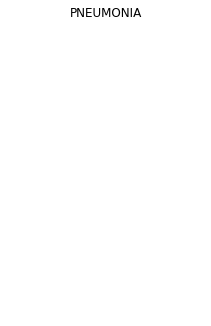

In [28]:
"""
Visualize the data augmented images from the training dataset

"""
plt.figure(figsize=(12,12))
for i in range (0,10):
    plt.subplot(2,5,i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        dic = {0:'NORMAL',1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        
plt.imshow(np.squeeze(image),cmap='grey',interpolation='nearest')

plt.tight_layout()
plt.show()


In [30]:
"""
Import necessary CNN libraries 

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau



In [ ]:
"""
Building the CNN architecture

"""
cnn = Sequential()

cnn.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (img_width,img_height,1)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (img_width,img_height,1)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (img_width,img_height,1)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (img_width,img_height,1)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (img_width,img_height,1)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu',units = 128))
cnn.add(Dense(activation = 'relu',units = 64))
cnn.add(Dense(activation = 'sigmoid',units = 1))






